In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

In [2]:
labels = pd.read_csv("processed_galaxy_data/labels_mappings_filtered.csv")

In [3]:
flattened_image_dir = "processed_galaxy_data/flattened_normalized_images.csv"

#load flattened images
flattened_data = pd.read_csv(flattened_image_dir, header = None) 

pca = PCA(n_components=35)

fitted_pca = pca.fit_transform(flattened_data)

Here, we can initiate and run our k-means with `n_clusters = 4` because we know that are interested in the four shapes of galaxies (S, E, SB, A) from our data. After running our k-means, we can calculate an Adjusted Rand score to see how well our model has clustered patterns in the data.

In [4]:
kmeans = KMeans(n_clusters=4, random_state=42)  
cluster_labels = kmeans.fit_predict(fitted_pca)

rand_index = adjusted_rand_score(labels['shape_label'], cluster_labels)
print("Adjusted Rand index:", rand_index)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand index: -2.9750823143143546e-05


We see a resulting Adjusted Rand index of around -2.2667e-05. This score is very poor and since the ARI is negative, we can interpret that the predicted clusters have less similarity to each other than if they were assigned by chance.

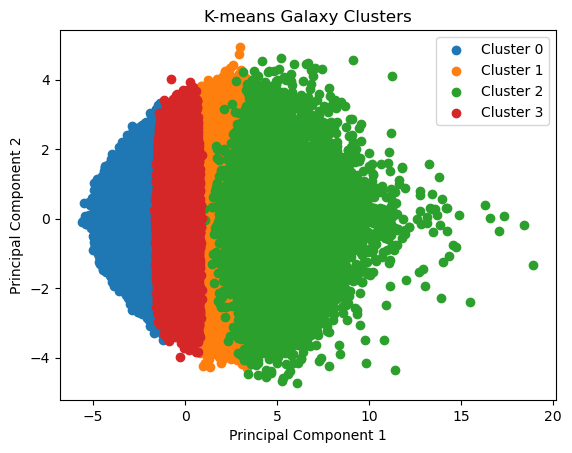

In [5]:
for cluster in range(4): 
    plt.scatter(fitted_pca[cluster_labels == cluster, 0], fitted_pca[cluster_labels == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Galaxy Clusters")
plt.legend()
plt.show()

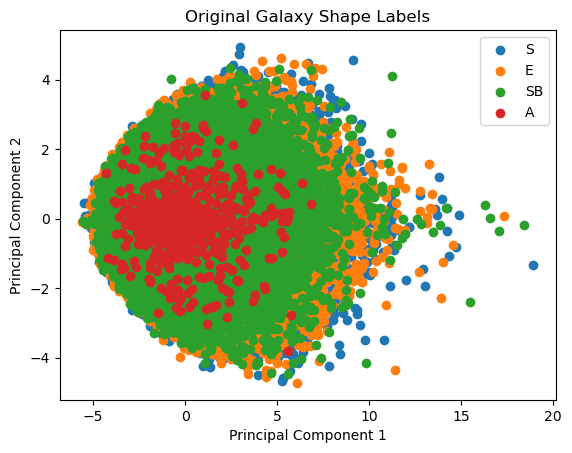

In [6]:
for shape_label in labels['shape_label'].unique():
    indices = labels['shape_label'] == shape_label
    plt.scatter(fitted_pca[indices, 0], fitted_pca[indices, 1], label=f'{shape_label}')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Original Galaxy Shape Labels")
plt.legend()
plt.show()

To investigate why our results are poor, we can compare the resulting clusters to the orginal data. The first plot, visualizes the how our k-means clustered the data, while the second plot visualizes the orginal data with labels. 

In the second plot, we can see lots of overlap between all of the clusters, as well as varying size of clusters. This could explain the poor results from our model, since k-means works best where there is equal variance/size, as well as well-seperated clusters. The results could also be due to working with dimensionality reduced data. Since we used PCA on our data, the data used might have lost details that could help identify the correct shapes. Although k-means works well when know the right number of clusters to use, we can see that it does not work well for our selected data, especially where there is varying sizes of clusters.